In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

t-statistic: nan, p-value: nan


/tmp/ipykernel_2649605/3157605989.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(group_lrv, group_con, equal_var=False)  # Welch's t-test for unequal variances
/tmp/ipykernel_2649605/3157605989.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='group', y='value', data=data, palette="Set2")


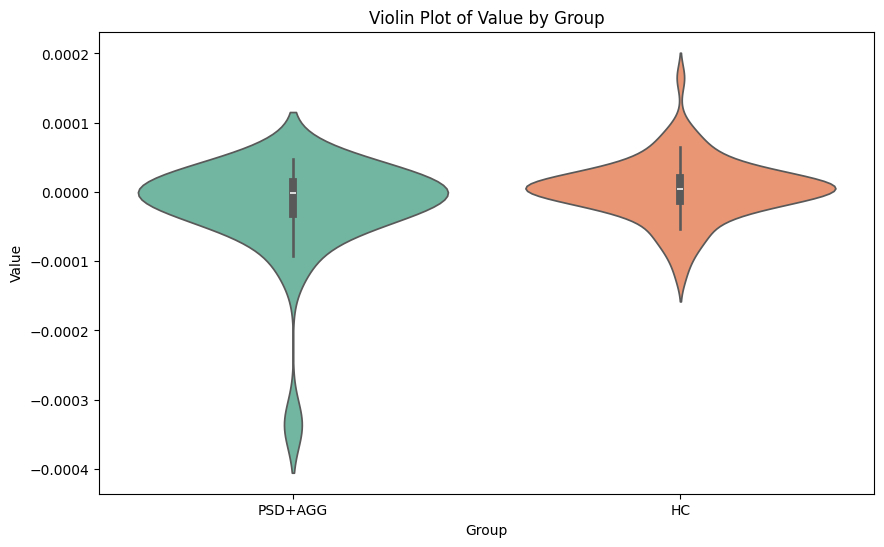

In [2]:


# Load the data from the CSV file
file_path = 'lrv_con_v5_ch3.csv'
data = pd.read_csv(file_path)

# Perform a statistical test (t-test) between groups 'lrv' and 'con'
group_lrv = data[data['group'] == 'lrv']['value']
group_con = data[data['group'] == 'con']['value']

# Perform an independent t-test
t_stat, p_value = ttest_ind(group_lrv, group_con, equal_var=False)  # Welch's t-test for unequal variances
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Create a violin plot to visualize the distribution of 'value' by 'group'
plt.figure(figsize=(10, 6))
sns.violinplot(x='group', y='value', data=data, palette="Set2")
plt.title('Violin Plot of Value by Group')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()


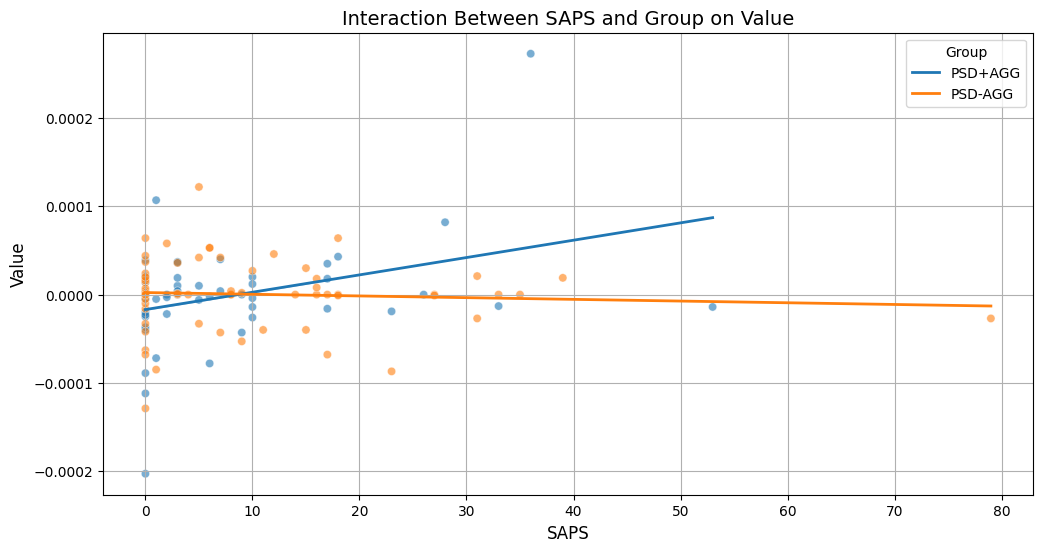

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3.303
Date:                Mon, 03 Feb 2025   Prob (F-statistic):             0.0230
Time:                        13:22:09   Log-Likelihood:                 962.06
No. Observations:                 113   AIC:                            -1916.
Df Residuals:                     109   BIC:                            -1905.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.696e-

In [13]:
# Load the dataset
file_path = 'lrv_pcon_v5_ch6.csv'
data = pd.read_csv(file_path)

# Ensure 'value' is numeric
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# Build the interaction model
interaction_model = smf.ols(formula='value ~ saps * group', data=data).fit()

# Create predictions for plotting
data['predicted_value'] = interaction_model.predict(data)

# Plot the interaction
plt.figure(figsize=(12, 6))

# Plot the predicted values (interaction effect)
sns.lineplot(data=data, x='saps', y='predicted_value', hue='group', linewidth=2, legend=True)

# Overlay scatter points for actual data
sns.scatterplot(data=data, x='saps', y='value', hue='group', alpha=0.6, legend=False)

# Add titles and labels
plt.title('Interaction Between SAPS and Group on Value', fontsize=14)
plt.xlabel('SAPS', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True)
plt.legend(title='Group')

# Show the plot
plt.show()

# Display model summary
print(interaction_model.summary())


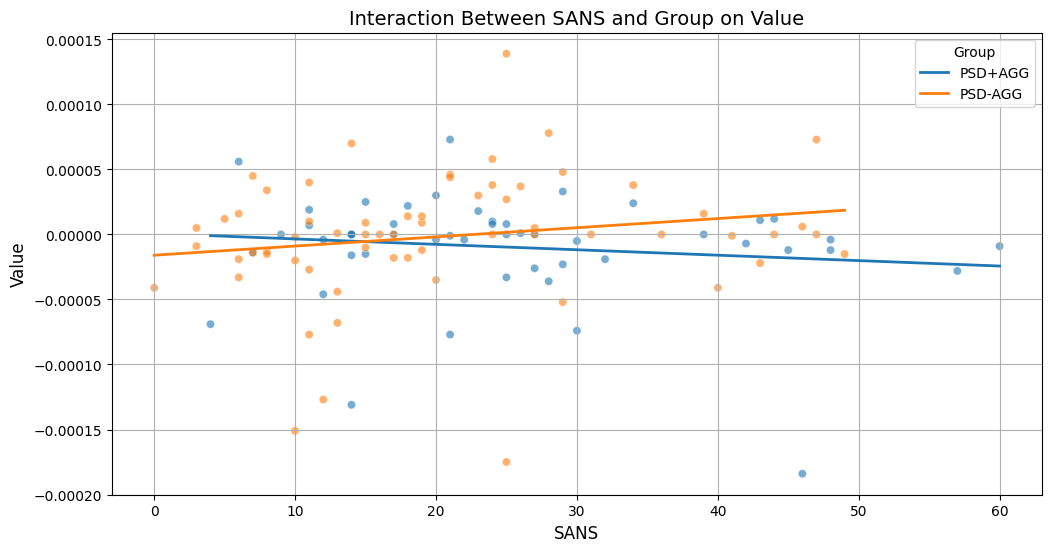

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.321
Date:                Mon, 03 Feb 2025   Prob (F-statistic):              0.271
Time:                        13:22:14   Log-Likelihood:                 970.64
No. Observations:                 113   AIC:                            -1933.
Df Residuals:                     109   BIC:                            -1922.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.372e-

In [14]:
# Load the dataset
file_path = 'lrv_pcon_v5_ch15.csv'
data = pd.read_csv(file_path)

# Ensure 'value' is numeric
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# Build the interaction model
interaction_model = smf.ols(formula='value ~ sans * group', data=data).fit()

# Create predictions for plotting
data['predicted_value'] = interaction_model.predict(data)

# Plot the interaction
plt.figure(figsize=(12, 6))

# Plot the predicted values (interaction effect)
sns.lineplot(data=data, x='sans', y='predicted_value', hue='group', linewidth=2, legend=True)

# Overlay scatter points for actual data
sns.scatterplot(data=data, x='sans', y='value', hue='group', alpha=0.6, legend=False)

# Add titles and labels
plt.title('Interaction Between SANS and Group on Value', fontsize=14)
plt.xlabel('SANS', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True)
plt.legend(title='Group')

# Show the plot
plt.show()

# Display model summary
print(interaction_model.summary())
